<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/23_LeNet_5_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,AveragePooling2D
from tensorflow.keras.datasets import mnist

In [20]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
model=Sequential()
model.add(Conv2D(6,activation='tanh',kernel_size=(5,5),input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(5,5),activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [25]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9827 - loss: 0.0571 - val_accuracy: 0.9813 - val_loss: 0.0529
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9866 - loss: 0.0425 - val_accuracy: 0.9825 - val_loss: 0.0556
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9879 - loss: 0.0370 - val_accuracy: 0.9879 - val_loss: 0.0398
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9902 - loss: 0.0303 - val_accuracy: 0.9845 - val_loss: 0.0525
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9851 - val_loss: 0.0475
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9922 - loss: 0.0234 - val_accuracy: 0.9849 - val_loss: 0.0502
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9931 - loss: 0.0202 - val_accuracy: 0.9868 - val_loss: 0.0419
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9949 -

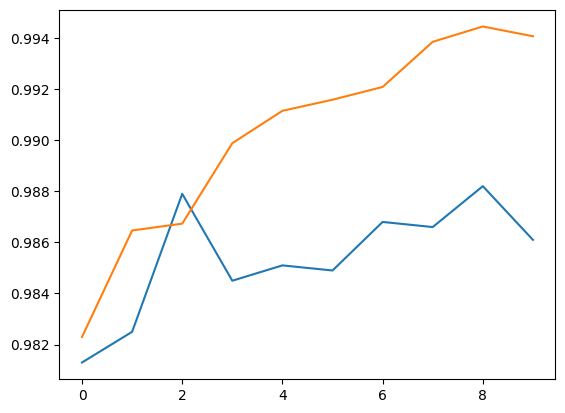

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(history.history['val_accuracy'])
sns.lineplot(history.history['accuracy'])
plt.show()

In [32]:
y_pred=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9861

In [34]:
X_test[278]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 128,
        191, 255, 255, 255, 128,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 191, 255, 255,
        255, 255, 255, 255, 255,  64,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  64, 255, 255, 255, 255,
        255, 255, 191, 255, 255, 128,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  64, 255, 255, 255, 255,  64,
          0,   0,   0,  64, 191, 255,  64,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 128, 255, 255, 128,   0,   0,
          0,   0,   0,   0,  64, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  64, 255, 255,  64,   0,   0,   0,
          0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 128, 255,  64,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 128, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 128, 255, 191,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  64, 255, 128,   0,   0,   0,   0,
          0,   0,   0,   0, 191, 255, 128,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 128, 191,   0,   0,   0,   0,
          0,   0,   0,   0, 255, 255,  64,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  64, 255, 191,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         64, 128, 191, 255, 255, 128,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 128, 255,
        255, 255, 255, 255, 255,  64,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 128, 255, 255, 255,
        255, 255, 255, 255, 255, 191, 128,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 128, 255, 191,   0,  64,
        255, 255, 191,   0,   0, 255, 255, 255, 128, 128,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 191, 128, 255,
        255, 255,  64,   0,   0,   0, 191, 255, 255, 191,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 191, 255, 255, 255, 255,
        255,  64,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  64, 255, 255, 255, 255,
         64,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 191, 255, 255,  64,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

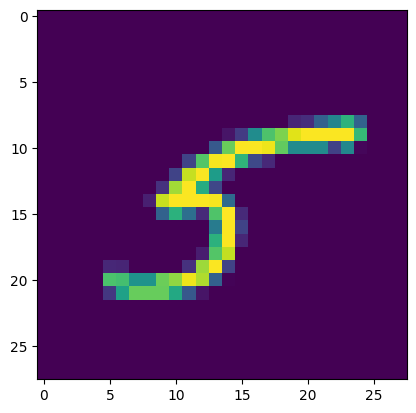

In [36]:
plt.imshow(X_test[8948])
plt.show()

In [37]:
y_test[8948]

np.uint8(5)

In [40]:
X_test[8948].shape

(28, 28)

In [45]:
model.predict(X_train[8948].astype('float32').reshape(1,28,28,1)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([3])

In [55]:
def predict_num(img_num):
  plt.imshow(X_test[img_num])
  print('Actual digit is',y_test[img_num])
  pred=model.predict(X_test[img_num].astype('float32').reshape(1,28,28,1)).argmax(axis=1)
  print('Predicted result is',pred)

Actual digit is 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted result is [7]


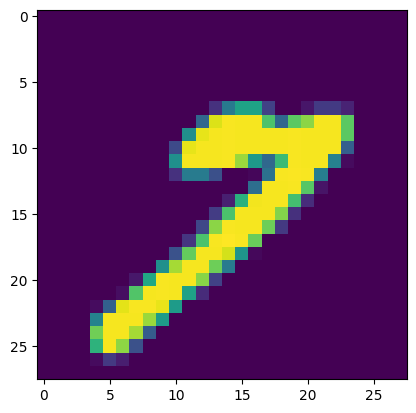

In [58]:
predict_num(6756)